# Time Series
## Clayton Boone and Edward Smith
## April 19, 2018

### What is a time series?

Time series are collections of data that are indexed by time. From *Time Series Analysis: Forecasting and Control* by George Box and Gwilym Jenkins:

> ... a great deal of data in business, economics, engineering, and the natural sciences occur in the form of *time series* where observations are *dependent* and where the nature of this dependence is of interest in itself.

Some examples of time series data would be:

- The average temperature of New York City on a day-by-day basis
- The daily closing value of the DJIA
- The count of sunspots
- Heights of ocean tides
- The number of UFO sightings daily in the US

Time series often seen use in financial situations, signal processing, and even classification (i.e. identifying a word based on a series of hand movements in sign language). Signal processing is a big part of time series analysis, and a lot of the conventions used in time series, especially in auto-regression (AR) models, come from conventions used in signal processing. However, this seminar will focus mainly on the use of forecasting with time series data. Before we get into some of the details of time series and forecasting, let's take a quick detour for a review of some Statistical Models concepts.

### Statistical Models and Time Series

For time series, it would be good to be reminded of two important concepts from Statistical Models: linear regression and correlation.

#### Linear Regression

As a reminder, linear regression is found using

$$
y_t = \alpha + \beta x_t + \epsilon_t
$$

where $\alpha$ is the intercept term, $\beta$ is the slope of the regression line, and $\epsilon_t$ represents some error term or white noise. This will become more important during auto-regression and moving average models.

As a side note, Pandas actually has OLS built-in.

#### Correlation

Correlation can be defined by how close two variables are to having a linear relationship with each other. In other words, correlation is a measure of how two variables are related. The correlation of two variables ranges between -1 and 1, with -1 indicating a strong negative relationship, 1 indicating a strong positive relationship, and 0 indicating absolutely no relationship between the variables.

For time series, we usually look at the percent change between steps instead of the actual levels. Why? Take the example of the Dow Jones Industrial Average and UFO sightings in the United States.

![DJIA/UFO Sightings](https://i.imgur.com/UOU6Ewj.png)

Looking at the levels themselves, there does seem to be an actual relationship between the two, which seems rather unlikely. When you find the correlation coefficient between the two, this supports this idea since it equals to **0.939976221073**.

However, as mentioned before, we need to look at the percent change instead of the actual levels. When you look at the correlation with the percent changes, the correlation ends up being **0.06**, which suggests almost no relationship between the two. This makes sense as it doesn't make any sense for UFO sightings and the DJIA to be correlated in any way... or does it?

### Forecasting with Time Series

Forecasting with time series data is predicting future values based on current and past values. To actually forecast any sort of values for time series, we need to find some way to correlate past and present data. To accomplish this, we will use the idea of *autocorrelation*. We also need to look at the concept of *resampling*, which we will do first.

#### Resampling

Simply put, resampling is taking time series and changing it to a different period. Often, we might take daily data and resample it into weekly, monthly, or even quarterly data. This is known as **downsampling**. The opposite, **upscaling**, is taking, say, monthly data and converting it into daily data. In both cases, data has to be invented from the existing data through interpolation or aggregation.

#### Autocorrelation

Autocorrelation in time series is finding any form of correlation between past values and present values. This is accomplished by lagging the data by *n* steps, with the case of 1 lag being called **lag-one** or **serial correlation**. Additionally, you can find the autocorrelation as a function of the lags; this is the **autocorrelation function (ACF)** as one would guess. ACF(1) is equal to lag-one correlation.

With autocorrelation, there are two behaviors normally exhibited:

1. **Mean reversion**: this means you regress towards the mean. This occurs when you have a negative autocorrelation.
2. **Momentum/Trend Following**: things tend to continue as they were. This occurs when you have a positive autocorrelation.

For a financial example, stocks or things with short horizons normally exhibit mean reversion, while commodities and things with longer horizons tend to be trend following.

One important idea with the ACF is the idea of adding additional lags as being statistically significant when compared to not adding that lag. Take the below data:

![ACF Quarterly](https://i.imgur.com/yuTGl0W.png)

The first line is ACF(0), which is always equal to 1. Additionally statistically significant lags occur every 4 lags. This trend will occur when the data you are looking at has a strong seasonal trend. Take HR Block stock prices. Every 4 quarters, there will likely be a vast increase in stock prices before dropping down after tax season.

#### White Noise

White noise, in general, is data that:

- Has a constant mean
- Has a constant variance
- Zero autocorrelation at all lags

White noise is an important topic in time series since things we often want to predict - stock prices as an example - often are white noise, or close to white noise. Since white noise has zero autocorrelation at all lags, this means that we cannot accurately predict stock prices as they are without some form of transformation. We will take about these transformations later. First, we need to discuss random walks and how to test if something is a random walk.

#### Random Walk

A random walk is simple. The simplest form of a random walk has $\mu=0$, and is of the form

$$
P_t = P_{t-1} + \epsilon_t.
$$

In other words, our next position is determined by our previous position plus some random white noise. There can additionally be some drift in a random walk:

$$
P_t = \mu + P_{t-1} + \epsilon_t.
$$

This is the same as the previous case, except $\mu\neq 0$. In both cases, we cannot forecast anything if our data follows a random walk, so determining if something is a random walk is important. To do this, we often use the Dickey-Fuller or Augmented Dickey-Fuller Test. For either case of the test, we first regress linearly on the series using the following:

$$
P_t = \alpha + \beta P_{t-1} + \epsilon_t
$$

or simple linear regression. In the base DF Test, we test the following:

$$
\text{H}_0: \beta = 1 \text{  vs  H:} \beta \leq 1
$$

in which the null hypothesis is that we do have a random walk. In the case of the Augmented DF (ADF) Test, we look at the case of adding more lag terms. In this case, we are testing:

$$
\text{H}_0: \beta = 0 \text{  vs  H:} \beta \leq 0
$$

in which case the null hypotheis is still the same: we have a random walk. The idea of random walks versus non-random walks brings up an important distinction for time series: stationary versus non-stationary series.

#### Stationary versus Non-stationary Series

Stationary data is data that is time invariant. That is, it doesn't depend on time. There are two levels of stationary data:

1. **Strong**: entire distribution of data is time invariant.
2. **Weak**: mean, variance, and autocorrelation are time invariant, and are only functions of $\tau$, or the number of lags.

Stationarity is important since if the parameters vary with time, there will be too much parameter estimation and it will be difficult, if not impossible, to create a parsimonious model (a model with as few predictor variables as possible). Because of this, we want our data to be as stationary as possible. Random walks, seasonal data, and data that experiences a change in mean or standard deviation are all examples of nonstationary data.

If we have nonstationary data, we do have some remedial measures, namely transformating the data. Some common examples of transformations are:

- Taking the first difference
- Taking a seasonal difference; useful for data that experiences a strong quarterly trend
- Taking the log of the data and then applying the difference; this is useful for exponential data that might also experience seasonal differences

#### Autoregressive (AR) Model

An autoregressive model is one of the first ways to forecast time series data. In an autoregressive (AR) model, the value from a time series is regressed on previous values from that same time series in the form of (at least for an AR(1) model):

$$
R_t = \mu + \phi R_{t-1} + \epsilon_t
$$

where $\mu$ is the mean, the second term is the previous value times a coefficient (the phase), and some disturbance term. This should appear somewhat similar to something we have already seen, that being a random walk. In fact, when $\phi=1$, we have a random walk. This means that for $-1 < \phi < 1$, we end up with stationary data which we want for forecasting. As expected, you can create AR models with more lag terms. This is represented at AR($n$), where you have $n$ lag terms. An AR(3) model might appear like:

$$
R_t = \mu + \phi_1 R_{t-1} + \phi_2 R_{t-2} + \phi_3 R_{t-3} + \epsilon_t
$$

For AR models, if you have a negative $\phi$, then you exhibit mean reversion behavior, and positive values of $\phi$ mean you have trend-following behavior. One interesting thing to note that when inputting values for $\phi$, you need to flip the sign. This is due to conventions in signal processing.

You can also look at ACF graphs for AR models. Positive values of $\phi$ have ACF graphs like the following:

![ACF Quarterly](https://i.imgur.com/mh1SyK6.png)

Negative values of $\phi$ have ACF graphs like so:

![ACF Quarterly](https://i.imgur.com/8h8pyp6.png)

One final note about AR models is that they can exhibit non-stationary behavior. The same cannot be said for the next model, the Moving Average (MA) model.

#### Moving Average (MA) Model

MA models are similar to AR models, except instead of adding in lag terms of the value, lag terms of the *error terms* are added. In other words, an MA(1) model would appear as:

$$
R_t = \mu + \theta\epsilon_{t-1} + \epsilon_t
$$

One other significant difference between AR and MA models is that for all values of $\theta$, finite MA models are all stationary.

ACF graphs for various values of $\theta$ are:

![ACF Quarterly](https://i.imgur.com/XLck8zO.png)

The blue bands are a measure of significance. Anything outside of the blue band is statistically significant.

One interesting thing to note is that it is possible to convert a finite AR series into an infinite MA series.

#### ARMA

Finally, it is possible to combine AR and MA models into an ARMA model, with paramaters $p$ and $q$, where $p$ is the number of lags in the AR model and $q$ is the number of lags in the MA model.

$$
R_t = \mu + \epsilon_t + \sum_{i=1}^p \phi_i R_{t-i} + \sum_{j=1}^q \theta_j \epsilon_{t-j}
$$

Now that the theory is out of the way, let's look through some examples of using time series data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
#ARIMA is used to fit a linear equation to our series

# Air Passenger data

In a time series each obervation is given a specific time. A time series also tells us how our data reacts over time and what changes might occur during a specific time period. An oberservation in a time series often relies on the last observation. In this data contains the average passenger count for an airline for each month between the years 1949 and 1960.

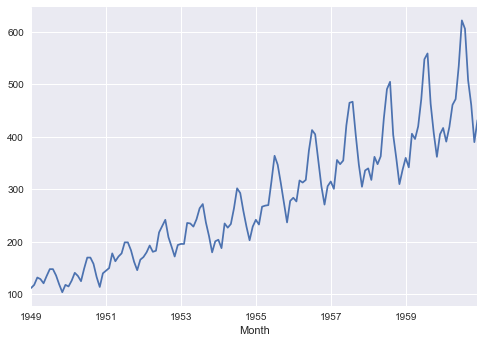

In [3]:
pass_df = pd.read_csv('AirPassengers.csv')
pass_df.Month = pd.to_datetime(pass_df.Month)
pass_df.set_index('Month', inplace = True)
pass_df = (pass_df['#Passengers'] + .00)
pass_df.head()
pass_df.plot()
plt.show()#does not look stationary at all but we will need to run test to make sure it is not stationary
#looking at the plot the graph seems to be increasing quickly so it may help to transform the data 

Rolling mean allows us to see the behavior of the mean based on a determined number of periods. For this set of data I used a window of 12 which calulated the mean for each set of 12 points. Since the data is seperated by year each mean calulated represents the mean of a specfic year. We can also calculate the rolling standard deviation to see if the standard deviation changes with time. By looking at the graph for the rolling mean it is clear that the mean increases with time, so the time series is not stationary, but we need to run more test to determine if the series is stationary or not.  

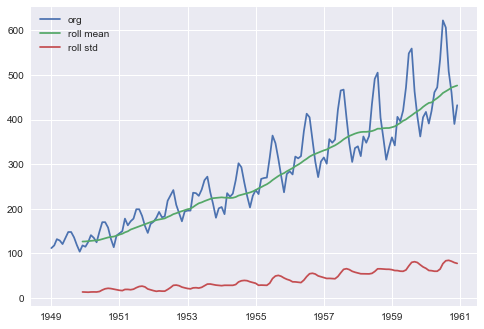

In [5]:
pass_roll_mean = pass_df.rolling(window=12, center = False).mean()
pass_roll_std = pass_df.rolling(window=12, center = False).std()
plt.plot(pass_df,label = 'org')
plt.plot(pass_roll_mean,label = 'roll mean')
plt.plot(pass_roll_std, label = 'roll std')
plt.legend()
plt.show()

In [6]:

pass_series = pd.Series(pass_df)
result = adfuller(pass_series.values,autolag='AIC')
result

(0.8153688792060434,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.692930839019)

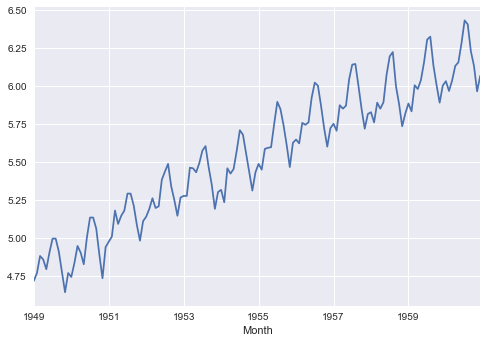

In [7]:
log_pass_df = np.log(pass_df)
log_pass_df.plot()
plt.show()
#allows use to see the trends 

# Using the First Difference

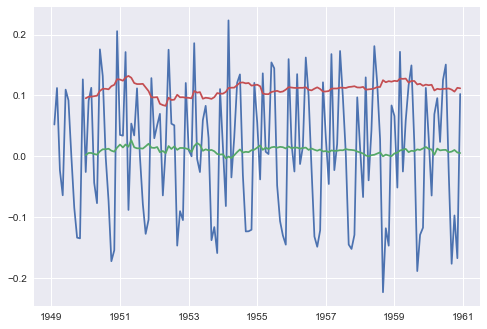

(-2.717130598388118,
 0.07112054815086118,
 14,
 128,
 {'1%': -3.4825006939887997,
  '10%': -2.578960197753906,
  '5%': -2.884397984161377},
 -440.35846985568094)

In [9]:
log_pass_diff = log_pass_df.diff(1)
log_roll_mean = log_pass_diff.rolling(window = 12, center=False).mean()
log_roll_std = log_pass_diff.rolling(window = 12, center=False).std()
plt.plot(log_pass_diff,label = 'log_diff')
plt.plot(log_roll_mean,label = 'log_mean')
plt.plot(log_roll_std,label = 'log_std')
plt.show()
log_pass_series = pd.Series(log_pass_diff)
log_pass_series = log_pass_series.dropna()#have to drop nan's
results = adfuller(log_pass_series)
results

# Estimating the Parameters for the Best model

PACF and ACF tells us what terms to use for our AR and MA models.The PACF function gives us an idea of the term we should use for our AR model. The PACF tells us the added benefit  of adding another lag. The plot PACF tells us how significant each lag is from zero. The number of lags that are significant from zero will be our term for the AR model. The Autocorrelation function gives us an idea of the term for the MA model for our data. The autocorrelation function tells use the number of lags for the autocorrelation to use. We use the nuber of lags that are significant from zero. For both plots if there are no lags that significant from zero then the series is considered white noise.

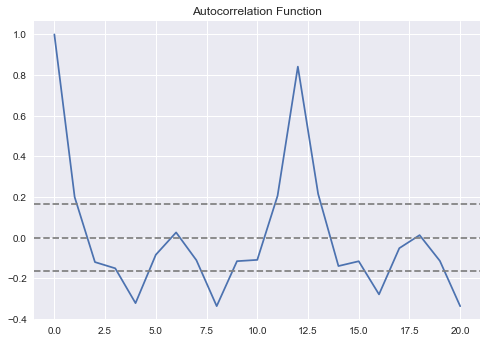

In [10]:
# p goes with ar (PCF) q goes with ma(ACF) d is  # differences
from statsmodels.tsa.stattools import acf,pacf
pass_acf = acf(log_pass_series, nlags=20)
pass_pacf = pacf(log_pass_series, nlags=20, method='ols')
plt.plot(pass_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_pass_series)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_pass_series)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

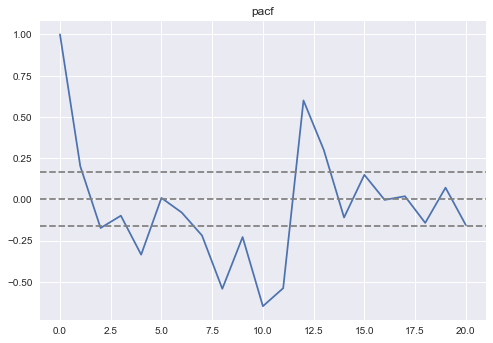

In [11]:
from statsmodels.tsa.stattools import acf,pacf,ARMA
pass_acf = acf(log_pass_series, nlags=20)
pass_pacf = pacf(log_pass_series, nlags=20, method='ols')
plt.plot(pass_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_pass_series)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_pass_series)),linestyle='--',color='gray')
plt.title('pacf')
plt.show()

# Intergrating a AR(2) model and MA(2) model

C:\Users\Clayton\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Clayton\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Clayton\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


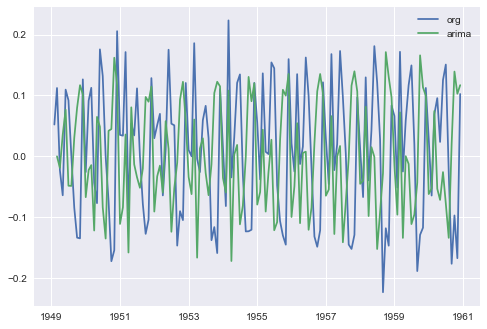

In [11]:
#d=1 p=2 q=2

model = ARIMA(log_pass_series, order=(2,1 , 2))  
results_ARIMA = model.fit()
results_please = results_ARIMA.predict()
plt.plot(log_pass_diff,label = 'org')
plt.plot(results_ARIMA.fittedvalues,label = 'arima')
plt.legend()
plt.show()


C:\Users\Clayton\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Clayton\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Clayton\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


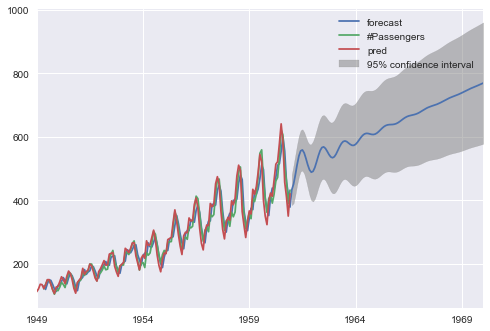

In [12]:
model = ARIMA(pass_df, order=(2,1 , 2)) 
results_ARIMA = model.fit()
pass_pred = results_ARIMA.predict()
forecast_pass = results_ARIMA.forecast(steps= (len(pass_df)))[0]
results_ARIMA.plot_predict(start = '1949-05-01', end = '1970-01-01')
pass_pred= pass_df.add(pass_pred, fill_value= 0)
pass_pred.plot(label='pred')
plt.legend()
plt.show()



# Checking the Accuacy of a Forecast


There are multiple metrics that can be used to check the accuracy of a time series. One of the most common metrics that is used in the root mean squared error. This metric gives more penalty to large error terms. The error for each point is calculated by subtracting the predicted value from the expected value then squaring the difference. Once the squared differnece for each oberservation has been calculated then we take the mean of all the observations. Another calulation that is used alot is the mean forecast error which is the mean of the differences between the expected values and predicted values. If the forecast error mean is positive then the model over forcasts. If the forecast error mean is negative then the model under forecasts. Ideally we want the forecast error to be as close to 0 as possible.

In [13]:
MSE = mean_squared_error(pass_df.values,pass_pred)
RMSE = sqrt(MSE)
mean_forecast_error= np.mean(pass_df.values-pass_pred)
print('RMSE:', RMSE)
print('Mean forecast error:' , mean_forecast_error)


RMSE: 22.383895396418318
Mean forecast error: -1.853264312643749


# Bruins goal data

This data frame contains the number of goals the Boston Bruins have scored from the year 1986 to the year 2016. Although this may not fit the criteria of a time series I still wanted to see if I would create a forcast that could tell us how many goals the bruins will score in future years. This idea may not be considered a time series because each observation does not depend on the last observation.   


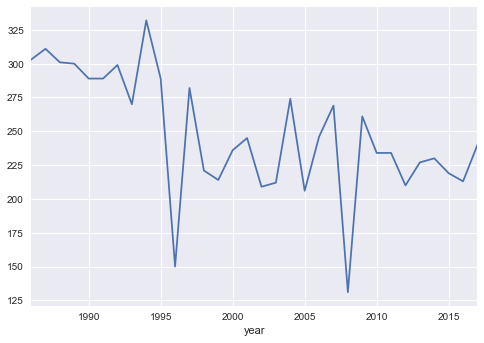

In [14]:
season = pd.read_csv('alot_of_seasons.csv')
bruins = season[season['Unnamed: 1'] == 'Boston Bruins'] 
bruins_ = season[season['Unnamed: 1'] == 'Boston Bruins*'] 
bruins_
bruins_df = pd.concat([bruins,bruins_],axis=0)
bruins_df = bruins_df.reset_index()
bruins_df = bruins_df.sort_values('index')
# bruins_df = bruins_df.set_index('index')
bruins_df.head()
year = np.arange(2017,1985,-1)
year = pd.DataFrame(year, columns=['year'])
bruins_df_2 = pd.concat([bruins_df,year], axis = 1)
bruins_df_2 = bruins_df_2.sort_values('year',ascending= True)
bruins_df_2 = bruins_df_2[['year','GF']]
bruins_df_2.head()
bruins_df_2.index = pd.to_datetime(bruins_df_2.year, format ='%Y')
bruins_df_2.head()
real_data = bruins_df_2['GF'] + .00
real_data.plot()
plt.show()

(-2.7679851635869315, 0.06299437821348308, 1, 30, {'1%': -3.6699197407407405, '5%': -2.9640707407407407, '10%': -2.621171111111111}, 194.86401607069456)


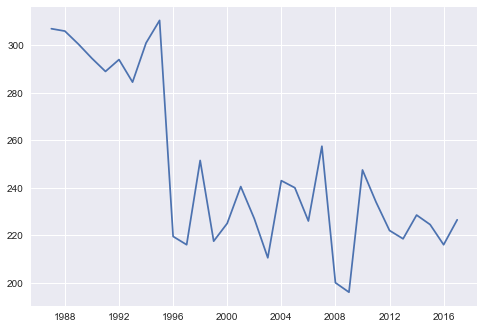

In [16]:
real_results = adfuller(real_data)
print(real_results)
roll_mean = real_data.rolling(window =  2, center= False).mean()
plt.plot(roll_mean)
plt.show()

# Using the First Difference

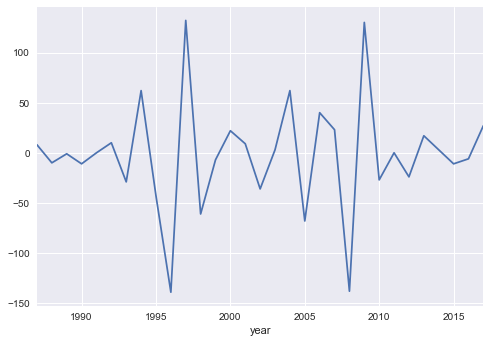

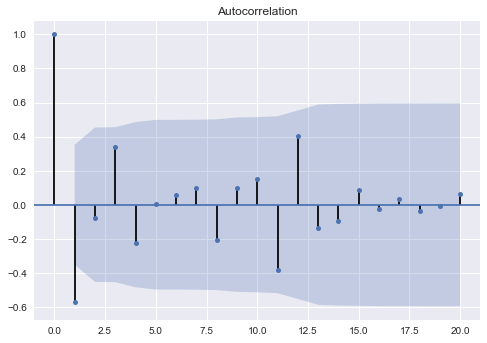

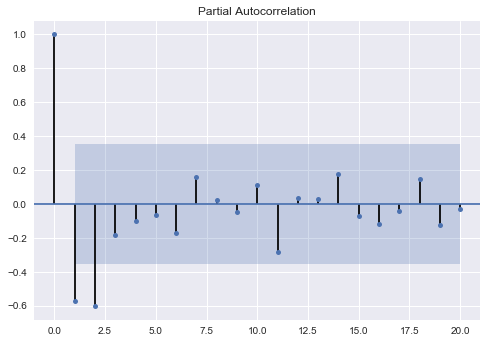

(-9.242863910423461,
 1.5654600360806404e-15,
 1,
 29,
 {'1%': -3.6790595944893187,
  '10%': -2.6231583472057074,
  '5%': -2.9678817237279103},
 208.37735967745783)

In [24]:
#p goes with ar (PCF) q goes with ma(ACF) d is  # differences
real_diffus = real_data.diff(1)
real_diffus = real_diffus.dropna()
real_diffus.head()
real_diffus.plot()
plot_acf(real_diffus, lags = 20)

plot_pacf(real_diffus, lags = 20)
plt.show()
real_diffus_results = adfuller(real_diffus)
real_diffus_results

# What model should I use?

Even thorgh the PACF and ACF graphs give a good idea of what our variables should be and what demision AR and MA models we shoulde use, we should still run multiple models with different constraints to decide which model will be the most useful. One method of determining which model is the best is by computing the Akaike information criterion or Bayesian information criterion for each model. After computing the AIC and BIC for each model we then choose the model with the smallest AIC or BIC value. AIC is an estimator of the relative quality of a model. AIC and BIC gives use information about how much information  is lost. AIC and BIC help reduce our chances of overfitting because these measures tell us how much information will be lost for the model we are lookin at. AIC rewards goodness of fit but also includes a penalty that is an increasing function of the number of estimated parameters. $AIC = 2K -2ln(\hat{L})$ where $K$ is the numberof estimated parameters in the model and $\hat{L}$ is the maximum value of the likelihood function for the model. $BIC = ln(n)K - 2ln(\hat{L})$ where $\hat{L}$ is the maximized value of the likelihood function of the model, $x$ is the observed data, $n$ is the number of data points in $x$ that are being used, $K$ is the number of parameters estimated by the model.

In [25]:
from statsmodels.tsa.arima_model import ARMA
mod_1 = ARMA(real_diffus, order = (0,1))
mod_2 = ARMA(real_diffus, order = (2,0))
mod_3 = ARMA(real_diffus, order = (1,0))
mod_4 = ARMA(real_diffus, order = (2,1))
result_1 = mod_1.fit()
result_2 = mod_2.fit()
result_3 = mod_3.fit()
result_4 = mod_4.fit()
print('mod_1 ', result_1.aic)
print('mod_2 ', result_2.aic)
print('mod_3 ', result_3.aic)
print('mod_4 ', result_4.aic)

C:\Users\Clayton\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Clayton\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


mod_1  321.0523814548388
mod_2  319.9107529557833
mod_3  331.72415127684
mod_4  320.11391594813085


# AR(2) model

C:\Users\Clayton\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Clayton\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Clayton\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


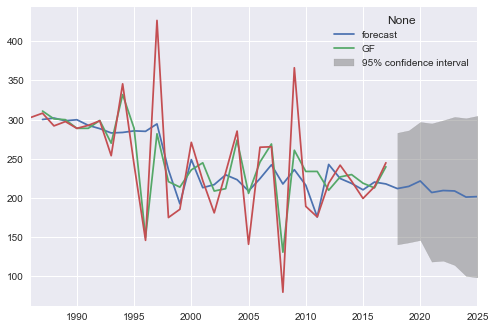

In [26]:
from statsmodels.tsa.arima_model import ARIMA
model_real = ARIMA(real_data, order = (2,1,0))
result_real = model_real.fit()
pred_hockey = result_real.predict()
forecast = result_real.forecast(steps= (len(real_data)))[0]
result_real.plot_predict(start='1987-01-01', end='2025-01-01')

fin_hockey_pred = real_data.add(pred_hockey,fill_value = 0)
fin_hockey_pred
fin_hockey_pred.plot()
plt.show()

In [27]:
MSE = mean_squared_error(real_data,fin_hockey_pred)
RMSE = sqrt(MSE)
print('on orginal data:', RMSE)
MSE_diff = mean_squared_error(real_diffus, pred_hockey)
RMSE_diff = sqrt(MSE_diff)
print('on diff: ', RMSE_diff)
for_error_mean = np.mean(real_data.values - fin_hockey_pred)
print('Forecast error mean:', for_error_mean)

on orginal data: 41.07652839580701
on diff:  36.33651299023244
Forecast error mean: 2.2245959328921447


# NY Temp Data

This data frame contains average yearly temperatures from the year 1870 to the year 2016. We want to build a forecast that gives us an estimate of yearly averages for future years.


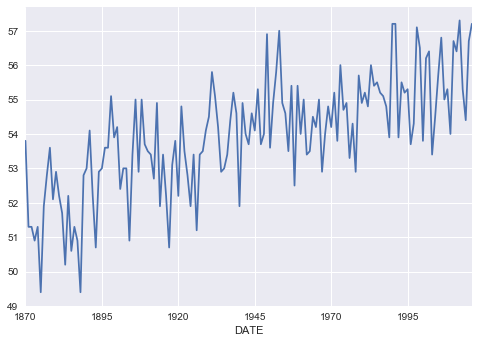

(-1.3978761406265385,
 0.5832938987871132,
 7,
 139,
 {'1%': -3.4782936965183815,
  '10%': -2.5779830117488745,
  '5%': -2.882567574015525},
 436.6711273667221)

In [28]:
import pandas as pd
temp = pd.read_csv('temp_avg.csv')
temp.index = pd.to_datetime(temp.DATE, format = '%Y')
temp = temp['TAVG']
temp.plot()
plt.show()# we have a trend so it looks like the series is not stationary
# need to perform the dickey fuller test to determine if the series is stationary
temp_results = adfuller(temp)
temp_results

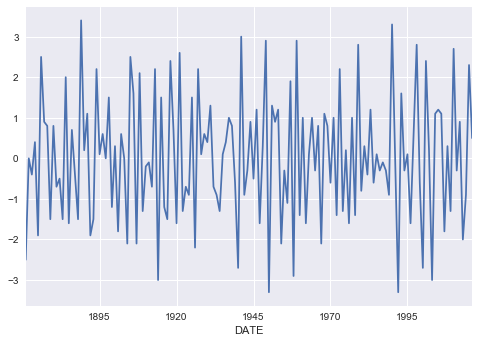

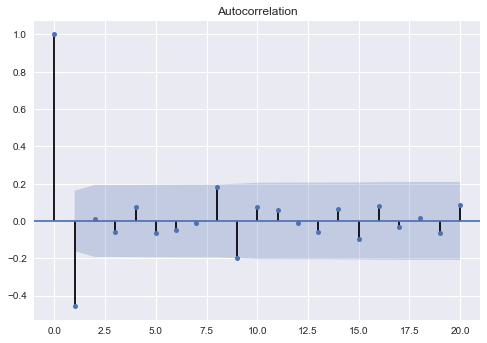

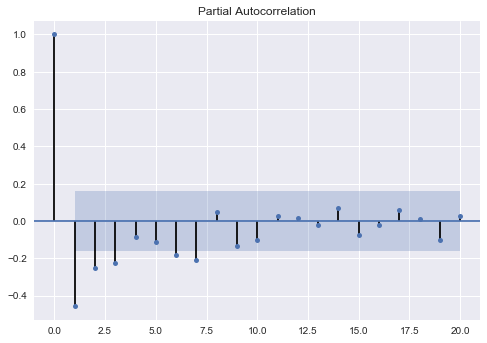

In [30]:
temp_diff = temp.diff()#allows use to make the series stationary
temp_diff = temp_diff.dropna()
temp_diff.plot()
plot_acf(temp_diff, lags = 20)

plot_pacf(temp_diff, lags = 20)
plt.show()
# temp_diff

In [31]:
from statsmodels.tsa.arima_model import ARMA
mod_1 = ARMA(temp_diff, order = (0,1))#AR(1)model
mod_2 = ARMA(temp_diff, order = (1,0))#MA(1)
mod_3 = ARMA(temp_diff, order = (0,2))#AR(2) model
mod_4 = ARMA(temp_diff, order = (1,1))#ARMA(1,1) model
result_1 = mod_1.fit()
result_2 = mod_2.fit()
result_3 = mod_3.fit()
result_4 = mod_4.fit()
print('mod_1 ', result_1.aic)
print('mod_2 ', result_2.aic)
print('mod_3 ', result_3.aic)
print('mod_4 ', result_4.aic)

C:\Users\Clayton\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Clayton\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


mod_1  469.39097515968166
mod_2  510.53468983139095
mod_3  469.3231537586662
mod_4  469.0729124240912


C:\Users\Clayton\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Clayton\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Clayton\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


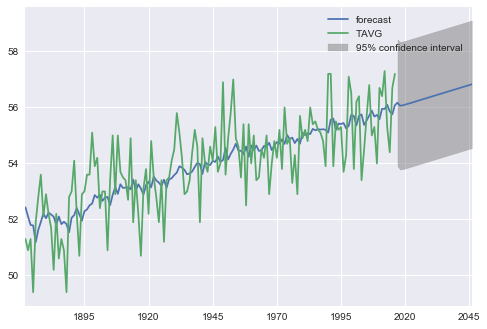

In [32]:

model_real = ARIMA(temp, order = (1,1,1))
result_real = model_real.fit(display = 0)
pred_2 = result_real.predict()
forecast = result_real.forecast(steps= (len(temp)))[0]
result_real.plot_predict(start='1872-01-01', end='2046-01-01')

# fin_pred.plot()
plt.show()

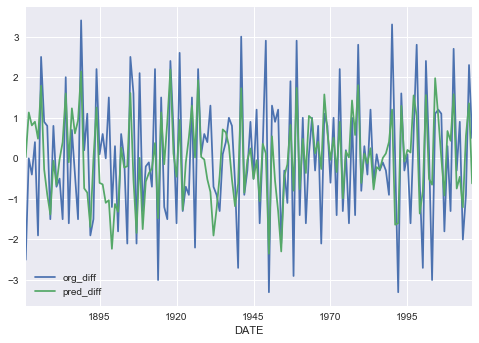

In [33]:
temp_diff.plot(label='org_diff')
pred_2.plot(label = 'pred_diff')
plt.legend()
plt.show()

In [34]:

#predicted values are bases on the difference data
fin_pred = temp.add(pred_2,fill_value = 0)
MSE = mean_squared_error(temp,fin_pred)
RMSE = sqrt(MSE)
print('RMSE:',RMSE)
temp_error_mean = np.mean(temp.values - fin_pred)
print('Forecast error mean:', temp_error_mean)


RMSE: 0.9849120418658013
Forecast error mean: -0.007791106478160675


C:\Users\Clayton\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


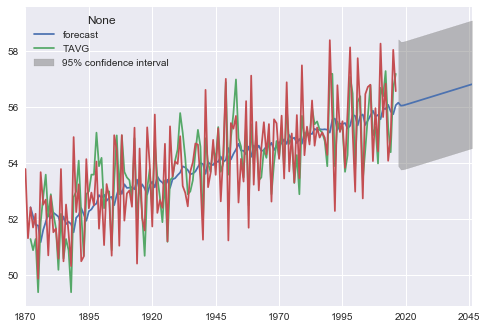

In [35]:
result_real.plot_predict(start='1872-01-01', end='2046-01-01')
fin_pred.plot()
plt.show()

# How can I train my model?

When training the models that we are accustomed to we often use cross validation techniques that randomize our data and split our data into blocks. We can randomize our data because the data we usaully use does not depend on each other. With time series this is not the case. In a time series the data is depends on time. This means that in a time series a data point depends on the point behing it. Since obervations in a time series depend on each other and time we can not randomize the data in a time series. Instead we have to seperate the data into to subsets which is also known as back tracking. To train a time series model you seperate the data into seperate parts and use one part to train the model and the other part to test the model.   

# Sources

1) https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/

2) https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

3) https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

4) http://www.forecastpro.com/Trends/forecasting101August2011.html

5) https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/